In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [7]:
delivery_sales_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
    	COUNT(products.product_id) AS count_sales,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_purchase_timestamp)) AS actual_delivery_date,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_estimated_delivery_date)) AS delay_delivery_date
    FROM
        orders
    INNER JOIN
    	order_items
    ON
        orders.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	count_sales DESC;
"""

In [9]:
delivery_sales_df = pd.read_sql(delivery_sales_sql, conn)
delivery_sales_df = delivery_sales_df.set_index("category_name")
delivery_sales_df.to_csv('delivery_sales.csv', header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_33284\2699869270.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_sales_df = pd.read_sql(delivery_sales_sql, conn)


In [10]:
delivery_sale_df

,count_sales,actual_delivery_date,delay_delivery_date
category_name,,,
bed_bath_table,11115,12.7505,-11.6562
health_beauty,9670,11.9150,-11.9701
sports_leisure,8641,12.0815,-12.0101
furniture_decor,8334,12.8352,-12.3995
computers_accessories,7827,13.1536,-12.4199
...,...,...,...
arts_and_craftmanship,24,5.6667,-6.7917
cds_dvds_musicals,14,10.5714,-16.8571
la_cuisine,14,7.6429,-16.3571


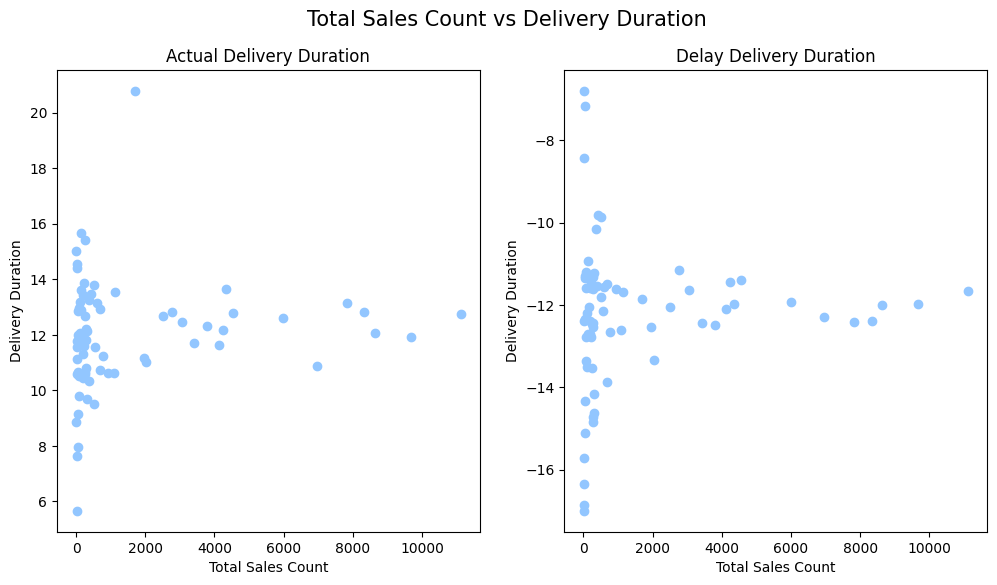

In [12]:
plt.style.use("seaborn-v0_8-pastel")
figure = plt.figure(figsize=(12, 6))
ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.scatter(delivery_sales_df["count_sales"], delivery_sales_df["actual_delivery_date"])
ax2.scatter(delivery_sales_df["count_sales"], delivery_sales_df["delay_delivery_date"])

ax1.set_title("Actual Delivery Duration")
ax1.set_xlabel("Total Sales Count")
ax1.set_ylabel("Delivery Duration")

ax2.set_title("Delay Delivery Duration")
ax2.set_xlabel("Total Sales Count")
ax2.set_ylabel("Delivery Duration")

figure.suptitle("Total Sales Count vs Delivery Duration", size=15)
plt.savefig("delivery_sales.png", bbox_inches='tight')